In [23]:
from utils import load, dump
from evaluate import eval
from os import getcwd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from build import categories
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import torch
import re

In [14]:
root = f'{getcwd()}/..'

## Let's try applying the BERTOverflow classifier on our annotated Cowait data

In [15]:
data = load(f'{root}/data/prd_backtick-se_cowait_annotated.json')

In [16]:
checkpoint = "jeniya/BERTOverflow"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=len(categories))
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

cp = torch.load(f'{root}/data/bertoverflow_model_big.pt', map_location=torch.device('cpu'))
model.load_state_dict(cp['model_state_dict'])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at jeniya/BERTOverflow and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [17]:
metrics = cp['metrics']

In [31]:
taccs = [*map(lambda e: e['train_acc']['accuracy'], metrics)]
vaccs = [*map(lambda e: e['val_acc']['accuracy'], metrics)]
tloss = [*map(lambda e: e['train_loss'].item(), metrics)]
vloss = [*map(lambda e: e['val_loss'].item(), metrics)]

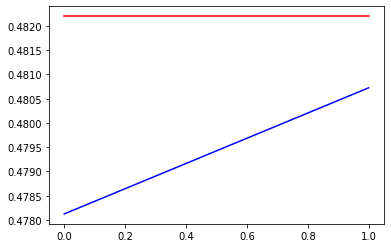

In [38]:
plt.figure()
plt.plot(taccs, 'b-')
plt.plot(vaccs, 'r-')

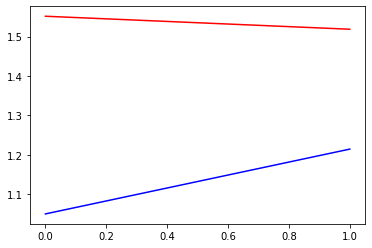

In [40]:
plt.figure()
plt.plot(tloss, 'b-')
plt.plot(vloss, 'r-')

In [8]:
model.eval()

def predict(text):
    inputs = tokenizer(text, padding='max_length', truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=-1)
    return preds

predict('this is a sentence')
predict('will probably have the same output')

tensor([0])

In [9]:
y_true = []
y_pred = []

for pr in data[:100]:
    title = pr['title']
    pcat = predict(title)
    tcat = pr['category']
    print(tcat, categories[pcat])
    
    y_true.append(tcat)
    y_pred.append(pcat)

non-functional fix-bugs
non-functional fix-bugs
non-functional fix-bugs
new-features fix-bugs
non-functional fix-bugs
new-features fix-bugs
documentation fix-bugs
non-functional fix-bugs
new-features fix-bugs
non-functional fix-bugs
non-functional fix-bugs
new-features fix-bugs
documentation fix-bugs
documentation fix-bugs
documentation fix-bugs
new-features fix-bugs
non-functional fix-bugs
non-functional fix-bugs
non-functional fix-bugs
new-features fix-bugs
new-features fix-bugs
non-functional fix-bugs
non-functional fix-bugs
new-features fix-bugs
new-features fix-bugs
non-functional fix-bugs
fix-bugs fix-bugs
new-features fix-bugs
non-functional fix-bugs
fix-bugs fix-bugs
non-functional fix-bugs
non-functional fix-bugs
documentation fix-bugs
non-functional fix-bugs
non-functional fix-bugs
fix-bugs fix-bugs
new-features fix-bugs
non-functional fix-bugs
new-features fix-bugs
new-features fix-bugs
new-features fix-bugs
fix-bugs fix-bugs
non-functional fix-bugs
new-features fix-bugs
non

In [12]:
eval(y_true, y_pred)

/Users/shabo/Documents/Backtick/exjobb/venv/lib/python3.9/site-packages/sklearn/utils/multiclass.py:150: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y = np.asarray(y)
/Users/shabo/Documents/Backtick/exjobb/venv/lib/python3.9/site-packages/sklearn/utils/multiclass.py:154: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old 

ValueError: Classification metrics can't handle a mix of multiclass and unknown targets